In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\formy\Desktop\Fazila\DataScience Course\Case_Studies\Case_Study1\Assignment2\iris.xls')

In [3]:
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
# Check for the null values in each of the columns
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.describe()


,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Filling SL column with the mean value
data['SL']=data['SL'].fillna(data.SL.mean())

In [9]:
# Filling SW column with the mean value
data['SW']=data['SW'].fillna(data.SW.mean())

In [10]:
# Filling PL column with the mean value
data['PL']=data['PL'].fillna(data.PL.mean())

In [11]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
data['Classification'].nunique()

3

##### Splitting dataset into Target and Features

In [13]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

#### Splitting the dataset into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
clr=LogisticRegression()
model=clr.fit(x_train,y_train)

C:\Users\formy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
y_pred_clr=model.predict(x_test)

In [25]:
#print the metrices
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_clr))
#print('Precision=',precision_score(y_test,y_pred_clr))
#print('Recall=',recall_score(y_test,y_pred_clr))
#print('f1 score=',f1_score(y_test,y_pred_clr))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_clr))
print(confusion_matrix(y_test, y_pred_clr))

Accuracy= 0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = [] # An empty list to store accuracy values
neighbors = np.arange(3,15) # K is taken in the range of 3 to 15


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc) #Add the accuracy value to the list

C:\Users\formy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\formy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

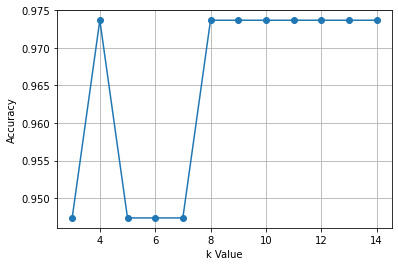

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid()

In [36]:
classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

C:\Users\formy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_knn))
#print('Precision=',precision_score(y_test,y_pred_knn))
#print('Recall=',recall_score(y_test,y_pred_knn))
#print('f1 score=',f1_score(y_test,y_pred_knn))


Accuracy= 0.9736842105263158


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_clr))
print(confusion_matrix(y_test, y_pred_clr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


## SVM

In [40]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')#specify the kernel as linear
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [56]:
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print('accuracy=',accuracy_score(y_test,y_pred_svm))
#print('Precision=',precision_score(y_test,y_pred_knn))
#print('Recall=',recall_score(y_test,y_pred_knn))
#print('f1 score=',f1_score(y_test,y_pred_knn))

accuracy= 1.0


In [42]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt=dt_clf.predict(x_test)

In [45]:
print('accuracy=',accuracy_score(y_test,y_pred_dt))

accuracy= 1.0


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))
confusion_matrix(y_test,y_pred_dt)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

## Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [52]:
y_pred_rf=rf_clf.predict(x_test)

In [53]:
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 1.0


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test,y_pred_rf)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

## Conclusion

In [ ]:
#From the analysis Logistic Regression and KNN got same values for accuracy. For Support Vector 
#Classifier, Decision Tree and 
